### ERA5 monthly averaged data on pressure levels from 1940 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5 monthly averaged data on pressure levels from 1940 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [1]:
import earthkit

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [2]:
temperature = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'variable': 'temperature',
        'product_type': 'monthly_averaged_reanalysis',
        'pressure_level': '850',
        'year': '2023',
        'month': '01',
        'time': '00:00',
    },
)

2025-11-05 14:52:45,263 INFO Request ID is c21823d2-511e-414a-a146-5e31a03d2390
2025-11-05 14:52:45,335 INFO status has been updated to accepted
2025-11-05 14:53:18,235 INFO status has been updated to running
2025-11-05 14:53:35,398 INFO status has been updated to successful


b0d035383c5336467aff14161ecb8c29.grib:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

In [3]:
geopotential = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'variable': 'geopotential',
        'product_type': 'monthly_averaged_reanalysis',
        'pressure_level': '500',
        'year': '2023',
        'month': '01',
        'time': '00:00',
    },
)

2025-11-05 14:53:37,350 INFO Request ID is 43b1efad-9981-4662-ae04-22fb8a6b639c
2025-11-05 14:53:37,398 INFO status has been updated to accepted
2025-11-05 14:53:45,852 INFO status has been updated to running
2025-11-05 14:53:51,017 INFO status has been updated to successful


1bb8699219122da3cf4fa89c3984b471.grib:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [4]:
temperature_style = earthkit.plots.styles.Style(
    colors="rainbow",
    levels=range(-40, 41, 2),
    extend="both",
    units="celsius",
)

For the pressure style, we want line contours with every fourth line double the thickness of the previous three. We want pressure contours every 4 *hPa*, so we will set our units to *hPa* and the `level_tep` to 4.

In [5]:
geopotential_style = earthkit.plots.styles.Style(
    colors="magma_r",
    levels={"step": 400},
    linewidths=[.25, .25, .25, .5],
    units="m2 s-2",
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

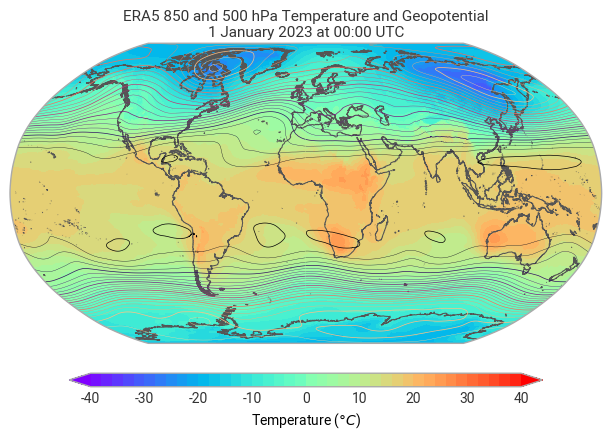

In [6]:
import cartopy.crs as ccrs

earthkit.plots.schema.figure.set(figsize=(6, 6))

crs = ccrs.Robinson()
chart = earthkit.plots.Map(crs=crs)

chart.quickplot(temperature, style=temperature_style, transform_first=False)
chart.legend(location="bottom")

chart.contour(geopotential, transform_first=False, style=geopotential_style)

chart.coastlines(resolution="high")

# For the title, we can take advantage of earthkit-plots metadata
# detection, which allows us to use format keys like 'variable_name'
# and 'time', which are then populated from the metadata of the data
# that's been plotted.
chart.title(
    "ERA5 {level} hPa {name}\n"
    "{time:%-d %B %Y} at {time:%H:%M} UTC",
    fontsize=11,
)

chart.show()
# To save the figure, uncomment the line below, make sure you have write permissions
# in the current directory.
# chart.save("overview-detail.png")

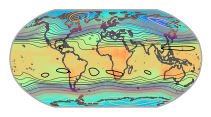

In [7]:
earthkit.plots.schema.figure.set(figsize=(2, 2))
chart = earthkit.plots.Map(crs=crs)

chart.quickplot(temperature, style=temperature_style, transform_first=False)
chart.contour(geopotential, transform_first=False, style=geopotential_style)
chart.coastlines()

chart.show()
# To save the figure, uncomment the line below, make sure you have write permissions
# in the current directory.
# chart.save("overview.png")